# **Inteligência Artificial - IC/UFRJ - 2022/1**
## **Tarefa 5 - Árvore de Decisão**
### Prof. João Carlos Pereira da Silva
#### João Ricardo Campbell Maia (DRE: 116111909)
#### Roberto Leonie Ferreira Moreira (DRE: 116062192)

Através deste *notebook*, iremos realizar um conjunto de experimentos via método de **árvore de decisão**. O conjunto de dados (*dataset*) escolhido pela dupla foi o de **Inadimplência de clientes de cartão de crédito**, do qual possui exatamente **30.000 instâncias** e **25 atributos.**

## **1. Descrição do *dataset* selecionado**

Conforme mencionado acima, a base possui exatamente **30.000 instâncias** e **25 atributos**, dos quais **24** são ***features*** e **um atributo objetivo.** 

De acordo com a descrição obtida no *Kaggle*, o atributo objetivo deste conjunto de dados é uma variável binária **pagamento padrão (Sim = 1, Não = 0).** 

São utilizadas como **variáveis independentes** $X$ **23** das 24 *features*. São estas:


*   $X_1 = $ Valor do crédito concedido (Novo Dólar Taiwanês (TWN)) `(moeda)`;
*   $X_2 = $ Gênero (Masculino = 1, Feminino = 2) `(inteiro)`;
*   $X_3 = $ Educação (Pós-Graduação = 1, Universidade = 2, Ensino Médio = 3, Outros = 4) `(inteiro)`;
*   $X_4 = $ Estado Civil (Casado = 1, Solteiro = 2, Outros = 3) `(inteiro)`;
*   $X_5 = $ Idade (ano) `(inteiro)`;
*   $[X_6-X_{11}] = $ Histórico de pagamentos anteriores de tal modo que um pagamento pode possuir sequência temporal de amortização e reembolso. $X_6 = $ status de reembolso em setembro de 2005, $X_7 =$ situação de amortização em agosto de 2005 e assim por diante.
A escala de medição para o estado de reembolso é: (Pagamento em dia = -1, Atraso no pagamento em um mês = 1, Atraso no pagamento por dois meses = 2, ..., Atraso no pagamento por $N$ meses = N, Atraso no pagamento por nove meses ou mais = 9) `(inteiro)`;
*   $[X_{12}-X_{17}] = $ Valor da fatura (Novo Dólar Taiwanês (TWN)) nos últimos seis meses, tal que $X_{12} =$ valor da fatura em setembro de 2005, $X_{13} =$ valor da fatura em agosto de 2015 e assim em diante `(moeda)`;
*   $[X_{18}-X_{23}] = $ Valor do pagamento (Novo Dólar Taiwanês (TWN)) nos últimos seis meses, tal que $X_{18} =$ valor da fatura em setembro de 2005, $X_{19} =$ valor da fatura em agosto de 2015 e assim em diante `(moeda)`.




## **2. Experimento Base**

Inicialmente, devem ser carregados pacotes essenciais para o andamento do projeto. São eles:

*   `pandas` (*Data Analytics*)
*   `scikit-learn` (*Machine Learning*)



In [142]:
import pandas as pd
import io
from google.colab import files
from sklearn.tree import DecisionTreeClassifier # importa o classificador de arvore de decisao
from sklearn import metrics # importa metrica para calcular acuracia - modulo do scikit-learn
from sklearn.model_selection import train_test_split

O **arquivo** a ser utilizado como nosso conjunto de dados é o `default of credit card clients - Data.csv`, do qual deve necessariamente estar no **mesmo diretório padrão** do *notebook*.

In [143]:
# nome dos atributos
col_names = ['ID',	'LIMIT_BAL',	'SEX',	'EDUCATION',	'MARRIAGE',	'AGE',	'PAY_0',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6',	'BILL_AMT1',	'BILL_AMT2',	'BILL_AMT3',	'BILL_AMT4',	'BILL_AMT5',	'BILL_AMT6',	'PAY_AMT1',	'PAY_AMT2',	'PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6',	'DEFAULTPAYMENT']

uploaded = files.upload()

# carregando a base de dados a ser usada
exemplo = pd.read_csv(io.StringIO(uploaded['default of credit card clients - Data.csv'].decode('utf-8')), header=None, names=col_names)

Saving default of credit card clients - Data.csv to default of credit card clients - Data (4).csv


Exibindo as **cinco primeiras instâncias** do *dataset*, temos:

In [144]:
exemplo.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTPAYMENT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Agora, iremos definir **quais serão os atributos (*features*) utilizados** na construção da nossa **árvore de decisão**, além de também definir o **conceito alvo** para cálculo. No nosso caso, estamos inicialmente considerando **todos os atributos** do *dataset* como variáveis para a construção da árvore.

Também será necessário dividir inicialmente o conjunto de dados (armazenado na variável `exemplo`) em **treinamento** ($60\%$) e **teste** ($40\%$).

Para facilitar futuras divisões do nosso conjunto de dados, criaremos uma função chamada `divideDataSet(tamTeste)`, em que a variável `tamTeste` determina o **tamanho do conjunto de teste**.

In [145]:
def divideDataSet(tamTeste):

  # definir o conceito alvo e as features usadas

  feature_cols = ['ID','LIMIT_BAL',	'SEX',	'EDUCATION',	'MARRIAGE',	'AGE',	'PAY_0',	'PAY_2',	'PAY_3',	'PAY_4',	'PAY_5',	'PAY_6',	'BILL_AMT1',	'BILL_AMT2',	'BILL_AMT3',	'BILL_AMT4',	'BILL_AMT5',	'BILL_AMT6',	'PAY_AMT1',	'PAY_AMT2',	'PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6'] # features (atributos) que serão usadas no aprendizado
  treino, teste = train_test_split(exemplo, test_size=tamTeste)
  X_treino = treino[feature_cols] # selecionamos as colunas correspondentes aos atributos que serao utilizados
  y_treino = treino.DEFAULTPAYMENT # conceito que queremos aprender. selecionamos a coluna com a classificacao das instancias
  X_teste = teste[feature_cols]
  y_teste = teste.DEFAULTPAYMENT

  return X_treino, y_treino, X_teste, y_teste

# definindo o tamanho do conjunto de teste para 40%
# X_treino, y_treino, X_teste, y_teste = divideDataSet(.4)

# definindo o tamanho do conjunto de teste para 30%
# X_treino, y_treino, X_teste, y_teste = divideDataSet(.3)

# definindo o tamanho do conjunto de teste para 25%
# X_treino, y_treino, X_teste, y_teste = divideDataSet(.25)

# definindo o tamanho do conjunto de teste para 20%
X_treino, y_treino, X_teste, y_teste = divideDataSet(.2)

Uma vez que parte dos dados de nosso exemplo são **categóricos** e não-numéricos, o classificador da árvore de decisão do `scikit` pode encontrar problemas. Logo, é necessário que os dados sejam **preparados** adequadamente para este classificador. 

Para isso, será utilizado o método `get_dummies()` da biblioteca `pandas`. Este método converte **valores de atributos puramente textuais ou categóricos** em valores de atributos **binários** (valores `0` ou `1`) através da **transformação** de *features* antigas em *features* novas que respondem a pergunta de **se dado valor ocorre para determinado atributo** inicialmente disposto no *dataset*.

In [146]:
# transformacao do conjunto de dados
Xone_hot_data = pd.get_dummies(X_treino)
Xone_hot_data.head() # exibindo as cinco primeiras instancias

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
11187,11188,200000,2,2,1,39,-1,2,-1,-1,...,5881,0,3331,0,0,5881,20,3331,0,8447
28287,28288,70000,2,2,2,32,2,0,0,0,...,50036,36908,29439,19494,3007,1794,2000,967,1000,870
25568,25569,200000,2,1,1,37,-1,-1,-1,-1,...,261,8203,13203,9691,0,261,8203,5000,0,13185
7479,7480,50000,1,2,2,39,0,0,0,0,...,50370,29862,29275,29535,2109,2406,1278,1036,1115,947
16278,16279,110000,2,2,2,32,1,-1,-1,-1,...,-153,6540,632,316,2345,0,7009,632,0,36049


Agora, será criado o **classificador de árvore de decisão**, selecionando o critério de **entropia** como função de seleção de atributo.

In [147]:
# criacao do classificador de arvore de decisao com criterio "entropia"
# e profundidade maxima de tamanho 5
clf = DecisionTreeClassifier(criterion="entropy",max_depth=5)

# usamos o metodo fit para construir o classificador a partir do conjunto de treinamento
clf = clf.fit(X_treino, y_treino)

Através do pacote `graphviz`, é possível **visualizar graficamente** a árvore de decisão gerada.

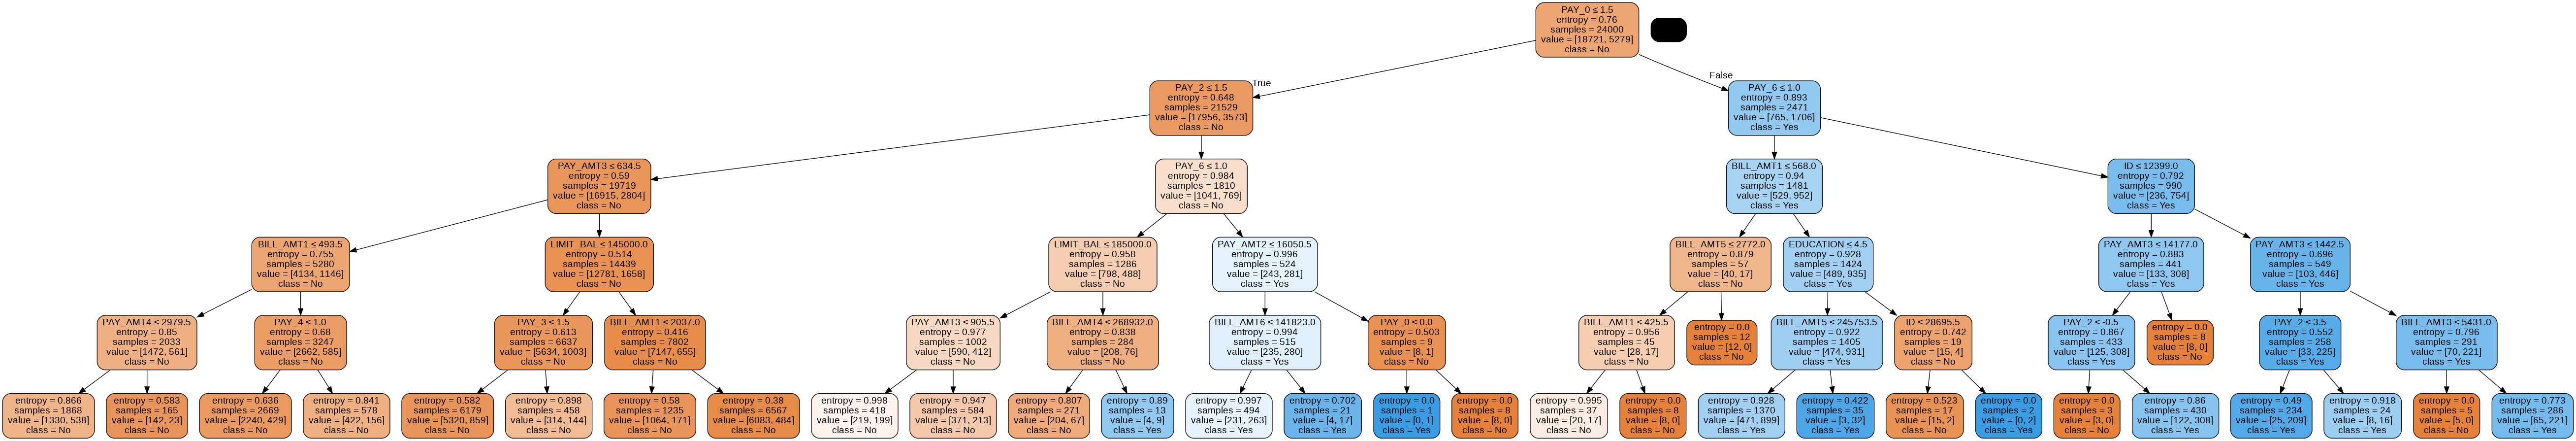

In [148]:
# importando os pacotes e bibliotecas
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# tem que usar feature_names = Xone_hot_data.columns pois feature_names = feature_cols tem menos atributos
# pois o Xone-hot acrescenta mais
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Xone_hot_data.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore1.png')
Image(graph.create_png())

A **acurácia** pode ser medida ao testar quantas instâncias são corretamente classificadas ("*verdadeiros-positivos*" e "*verdadeiros-negativos*").

É importante observar que **todas as instâncias disponíveis no conjunto de treinamento** estão sendo utilizadas.

Utilizando modelo para classificar os dados que temos à disposição através de um atributo que será previsto (`y_pred`) pela **árvore de decisão** a partir do conjunto de **teste** com as **variáveis independentes** $x_i$, temos: 

In [149]:
y_pred = clf.predict(X_teste)

# medicao da acuracia, que indica quantas instancias 
# estao sendo corretamente classificadas
print("Acuracia     =", metrics.accuracy_score(y_teste, y_pred))
accPct = metrics.accuracy_score(y_teste, y_pred) * 100
print('Acuracia (%%) = %.2f\n' % accPct)

Acuracia     = 0.8203333333333334
Acuracia (%) = 82.03



Posteriormente, dividimos o conjunto de dados para **treinamento** e **teste**, respectivamente, em:

1.   treinamento: 60%, teste: 40%;
2.   treinamento: 70%, teste: 30%;
3.   treinamento: 75%, teste: 25%;
4.   treinamento: 80%, teste: 20%,   

com os respectivos resultados de acurácia (a profundidade da árvore de decisão continuou em 5):

1.   0.8164 (81.64%);
2.   0.824  (82.40%);
3.   0.8176 (81.76%);
4.   0.812 (81.20%).

Conforme observado, verificou-se uma certa **estabilidade no valor de acurácia**, independentemente da divisão do *dataset*.

Alterando a profundidade da árvore de decisão para valores iguais a $\{6,7,8,9,10\}$ e divisão em **80$\%$ treinamento** e **20$\%$ teste**, temos os respectivos **valores de acurácia**:

*   `max_depth = 6`: 0.8117 (81.17%);
*   `max_depth = 7`: 0.8115 (81.15%);
*   `max_depth = 8`: 0.8073 (80.73%);
*   `max_depth = 9`: 0.802 (80.20%);
*   `max_depth = 10`: 0.8017 (80.17%).

Conforme variou-se a profundidade da árvore de decisão, o que notou-se foi uma leve perda de acurácia, mas não o suficiente para garantir que seja apenas uma oscilação dentro da estabilidade ou uma real perda. Esta oscilação não é suficiente para nos mostrar o real comportamento da alteração da acurácia.

### ***K-Fold Cross-validation***

Após estes experimentos, a dupla também tentará modelar a árvore de decisão através do método de ***K-Fold Cross-validation***. Como estamos sem ideia para escolher um valor de "*dobragem*" dos dados para $K$, sortearemos este valor.

É importante lembrar que para cada uma das etapas do *K-Fold*, este conjunto de dados é novamente dividido em conjuntos de treinamento e teste. Cada instância do *dataset* é chamada no algoritmo como parte do *training set* em $k-1$ etapas e em somente **uma etapa** do *test set*. Isto é, **todos os elementos são usados para treinamento e teste.**

A cada iteração do *K-Fold*, o tamanho do conjunto de treinamento é igual a $N(K-1)/K$, enquanto que o tamanho do conjunto de teste é menor, igual a $N/K$, sendo $N =$ tamanho do conjunto de dados.

In [150]:
import random

# escolhendo k no intervalo [1,5]
k_escolhido = random.randint(1,5)
print("K = %d\n" % k_escolhido)

K = 5



Aqui, a classe `sklearn.model_selection.KFold()` será invocada para que o algoritmo seja inicializado. Além disso, a **árvore de decisão** será modelada para atender ao algoritmo de ***K-Fold Cross-validation*** utilizando critério ***Gini***, uma vez que o critério de **entropia** já foi utilizado acima e, enquanto dupla, gostaríamos de diversificar ao máximo os critérios utilizados no *notebook*. 

**A cada iteração do *K-Fold* (`for` *loops*), a árvore de decisão é atualizada com a inserção de novas folhas.**

Vale relembrar que nosso atributo objetivo é a coluna `DEFAULTPAYMENT` do arquivo *.csv*.

In [151]:
# importando pacote e biblioteca
from sklearn.model_selection import KFold

# para execucao dos testes (n_splits >= 2)
# kf = KFold(n_splits=20)

# para execucao padrao (tamanho de K aleatorio)
kf = KFold(n_splits=k_escolhido)

print(kf) # imprimindo a inicializacao do objeto KFold

# obtendo em quantos conjuntos distintos o algoritmo de KFold
# esta dividindo a entrada .csv inicial. 
# no nosso caso, k_escolhido splits
# (relembrando que o nosso .csv tratado eh Xone_hot_data).
print(kf.get_n_splits(Xone_hot_data))

# y sera o atributo objetivo (alvo)
y = exemplo.DEFAULTPAYMENT

# CRIACAO DA ARVORE DE DECISAO (GINI)
# criacao do classificador de arvore de decisao com criterio "gini"
# e profundidade maxima de tamanho 5
clf = DecisionTreeClassifier(criterion="gini",max_depth=5)

# dividindo o conjunto de dados. queremos prever
# a partir de Xone_hot_data
for indice_treino, indice_teste in kf.split(Xone_hot_data) :
  # print("\nTREINO:", indice_treino)
  # print("TESTE:", indice_teste)
  
  X_treino, X_teste = Xone_hot_data.iloc[indice_treino], Xone_hot_data.iloc[indice_teste]
  y_treino, y_teste = y[indice_treino], y[indice_teste]

  # usamos o metodo fit para construir o classificador a partir do conjunto de treinamento
  clf = clf.fit(X_treino, y_treino)

  # imprimindo valores (testando "corretude" da base de dados)
  # print("\n", X_treino)
  # print("\n", X_teste)
  # print("\n", y_treino)
  # print("\n", y_teste)

KFold(n_splits=5, random_state=None, shuffle=False)
5


**Visalizando graficamente** a árvore de decisão gerada, temos:

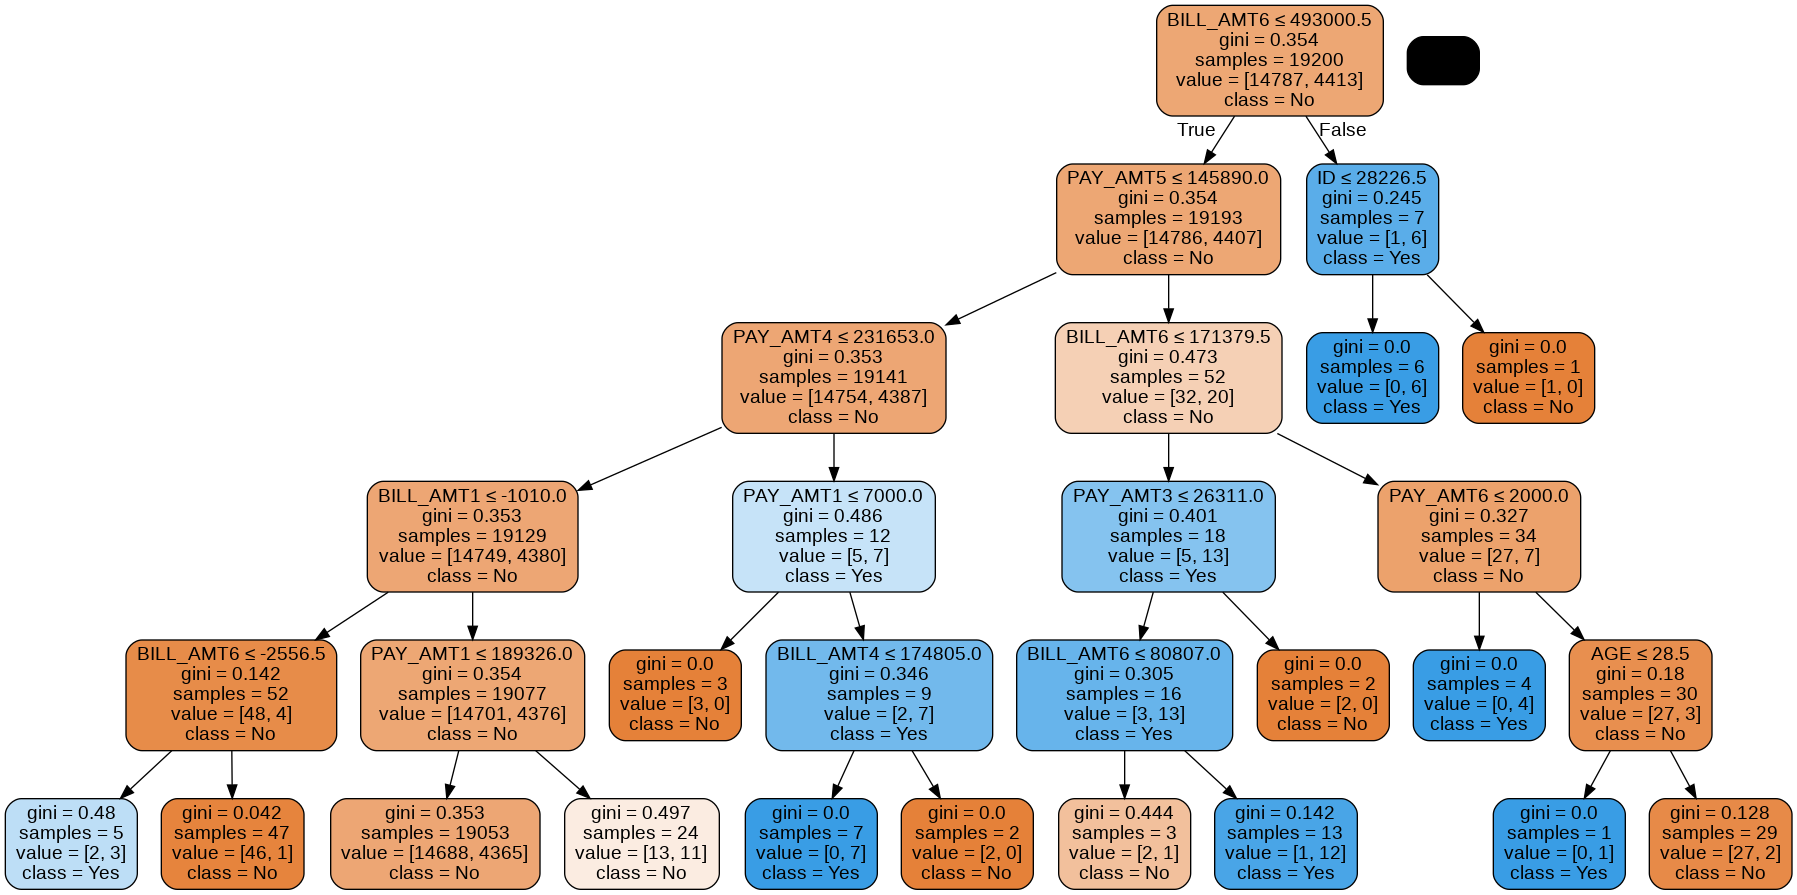

In [152]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = Xone_hot_data.columns,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arvore_k_fold.png')
Image(graph.create_png())

É importante ressaltar que, diferentemente do método de simplesmente **separar exemplos**, o *K-Fold* está utilizando **todas as instâncias** do *dataset* como pertencentes aos conjuntos de **treinamento** e de **teste**, independentemente do valor de $K$. Além disso, percebe-se logo acima que **a largura da árvore de decisão usando *K-Fold* e critério de *Gini* é menor do que utilizando separação de dados padrão com critério de entropia.**


Medindo a **acurácia** deste modelo de aprendizado de máquina através do atributo `y_pred` do qual queremos prever, temos:

In [153]:
y_pred = clf.predict(X_teste)

# medicao da acuracia
print("Acuracia     =", metrics.accuracy_score(y_teste, y_pred))
accPct = metrics.accuracy_score(y_teste, y_pred) * 100
print('Acuracia (%%) = %.2f\n' % accPct)

Acuracia     = 0.79875
Acuracia (%) = 79.88



## **3. Explorando Alternativas**

De modo a **tentar melhorar os resultados obtidos**, exploraremos alternativas aos parâmetros já determinados durante o algoritmo de *K-Fold Cross-validation*. Uma vez que, para *K-Fold*, os tamanhos do conjunto de treinamento e teste são iguais a 100%, **o tamanho não será algo a ser alterado.**

Porém, ao alterar a **profundidade máxima** da **árvore de decisão** gerada por ***K-Fold/Gini***, podemos observar os seguintes valores de **acurácia**:

a) **Poda da árvore** (valores de profundiadade iguais a $\{1,2,3,4\}$):
(importante relembrar que o `default` de **nosso projeto** é igual a `5`)

*   `max_depth = 1, K = 4`: 0.7966 (79.66%);
*   `max_depth = 2, K = 4`: 0.7963 (79.63%);
*   `max_depth = 3, K = 4`: 0.7963 (79.63%);
*   `max_depth = 3, K = 4`: 0.8082 (80.82%);
*   `max_depth = 4, K = 4`: 0.7996 (79.96%).

Para a **poda** da árvore, observou-se variações de acurácia **pouco significativas**, indicando uma certa tendência de **estabilidade independentemente da profundidade máxima** da árvore de decisão.

b) ***Aumento* da árvore** (valores de profundidade iguais a $\{6,7,8,9\}$):

*   `max_depth = 6, K = 5`: 0.7989 (79.89%);
*   `max_depth = 7, K = 5`: 0.7956 (79.56%);
*   `max_depth = 8, K = 5`: 0.796 (79.6%);
*   `max_depth = 9, K = 5`: 0.7952 (79.52%).

Para o **aumento da profundidade** da árvore, também observou-se **tendência de estabilidade** para os valores de acurácia.

c) **Alteração do valor de $K$**

Para diferentes valores de `K`, mas com o valor `max_depth = 5` para a árvore de decisão, tivemos:

*   `K = 2`, *2-fold*: 0.7735 (77.35%);
*   `K = 3`, *3-fold*: 0.776 (77.60%);
*   `K = 4`, *4-fold*: 0.7946 (79.46%);
*   `K = 5`, *5-fold*: 0.7991 (79.91%);
*   `K = 6`, *6-fold*: 0.7962 (79.62%);
*   `K = 7`, *7-fold*: 0.796 (79.6%);
*   `K = 8`, *8-fold*: 0.8083 (80.83%);
*   `K = 9`, *9-fold*: 0.8151 (81.51%);

    ...

*   `K = 18`, *18-fold*: 0.8095 (80.95%);
*   `K = 19`, *19-fold*: 0.8052 (80.52%);
*   `K = 20`, *20-fold*: 0.81 (81%);

    ...

Note que o objeto `sklearn.model_selection.KFold()` apenas aceita `n_splits` $\geq 2$, **não sendo possível o caso particular de *1-fold*.**

Verificou-se também, para `max_depth = 5`, um **"alargamento" da árvore de decisão** para diferentes valores de $K \leq 5$, mas um comportamento contrário (árvore com largura menor) para `K = 6`, e voltando a se alargar para `K = 7`, se "comprimindo" novamente para `K = 8`, *alargando* para `K = 9` e assim por diante.

Já para a **acurácia de *K-Fold***, foi notado um aumento significativo proporcional ao tamanho de K, **melhorando a previsão do nosso modelo** até que se atingisse uma certa estabilidade no valor de aproximadamente $81\%$.

É importante dizer que a dupla esperava que a acurácia melhorasse conforme os parâmetros `K` e `max_depth` aumentassem, o que **não foi visto.** **A acurácia só possui ligeira melhora para o aumento de `K`**, ignorando alterações em `max_depth`.

## **4. Comparação de Resultados**

A partir dos resultados obtidos na base escolhida e observados neste *notebook*, a dupla fará aqui comparação com resultados que podem ser obtidos através de outros métodos que não a separação simples do *dataset* ou o algoritmo de *K-Fold Cross-validation*.

Entre os métodos disponíveis no *Kaggle*, escolhemos o modelo de **Regressão Logística**, uma vez que este foi o **último conteúdo dado em sala de aula.** 

Inicialmente, iríamos escolher o método de Regressão Linear. Todavia, o conjunto de dados de entrada contém **dados categóricos**, sendo melhor optar pelo modelo de **Regressão Logística.**

Também escolhemos o modelo de Regressão Logística por este ser um modelo de aprendizado de máquina **supervisionado**. Isto é, um modelo que **a partir de alguns pares de exemplos entrada-saída (input-output), aprende uma função que mapeia a entrada na saída** *(DA SILVA, João C. P., Aula 9 - Vídeo 1 - Aprendizado de Máquina)*, e que ainda faz parte de nosso estudo inicial de aprendizado de máquina.



### **Aprendizado Supervisionado**

Relembrando, um algoritmo de aprendizado de máquina é tido como de **aprendizado supervisionado** quando o modelo está sendo treinado em um conjunto de dados *rotulado.* **Conjunto de dados rotulado** é aquele que possui **parâmetros de entrada e saída.** Neste tipo de aprendizado, os conjuntos de dados de treinamento e teste (ou validação) são rotulados.


### **Regressão Logística**

**Regressão Logística** é um modelo estocástico ou estatístico que em sua forma básica utiliza **uma função logística** 

\begin{align}
h _{\theta} (x) = g(\mathbf{\Theta}^T x)
\end{align}

para **modelar uma variável dependendente binária**, embora existam muitas extensões mais complexas. O **código** do modelo obtido no *Kaggle* pode ser visto abaixo.

In [154]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from numpy.random import randn
import random
from IPython.core.display import display,Image
from string import Template
import IPython.display
import warnings

class logisticRegression:

  def __init__(self,lr=0.001,n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    #init parameters
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    #gradient descent
    for _ in range(self.n_iters):
      linear_model = np.dot(X,self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)

      dw = (1/n_samples) * np.dot(X.T,(y_predicted-y))
      db = (1/n_samples) * np.sum(y_predicted-y)

      self.weights -= self.lr *dw
      self.bias -= self.lr * db 

  def predict(self,X):
    linear_model = np.dot(X,self.weights) + self.bias
    y_predicted = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i>0.5 else 0 for i in y_predicted]
    return y_predicted_cls
  
  def _sigmoid(self,x):
    return(1/(1+np.exp(-x)))

#Test Logistic regression in breast_cancer
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)



def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)
  return accuracy

regressor = logisticRegression(lr=0.0001,n_iters=1000)
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

print("Accuracy: ",accuracy(y_test, predictions))


# nossa "humilde" participacao neste codigo:
print("Foi obtida uma acuracia de %.2f %%\n" % (accuracy(y_test, predictions)*100))

Accuracy:  0.9298245614035088
Foi obtida uma acuracia de 92.98 %



### **Considerações Finais**

Como pode ser visto acima, a acurácia obtida pelo modelo de **Regressão Logística** contido no *Kaggle* ($\approx 92\%$) é superior à dos algoritmos escritos pela **dupla** ($\approx 81\%$). 

Faz sentido, uma vez que é a acurácia de uma dupla de estudantes de Inteligência Artificial contra a acurácia de um *website* referência em *Machine Learning* 😛.

## **Referências:**

1.   https://www.kaggle.com/datasets/gabrieloliveirasan/inadimplncia-de-clientes-de-carto-de-crdito?resource=download
2.   *Pandas*: https://pandas.pydata.org/
3.   *Scikit-learn*: https://scikit-learn.org/stable/
4.   https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
5.   *Graphviz*: https://graphviz.org/
6.   https://pypi.org/project/graphviz/
7.   https://stackoverflow.com/questions/9333245/python-printing-text-after-printing-a-variables
8.   https://stackoverflow.com/questions/10678229/how-can-i-selectively-escape-percent-in-python-strings
9.   https://www.w3schools.com/python/ref_random_randint.asp
10.  *K-Fold*: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
11.  *Outros algoritmos, dentre eles o de Regressão Logística*: https://www.kaggle.com/code/milan400/machine-learning-algorithms-from-scratch/notebook
12.  https://www.programcreek.com/python/example/91153/sklearn.model_selection.KFold
13.  https://www.activestate.com/resources/quick-reads/how-to-access-a-row-in-a-dataframe/
14.  https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/
15.  https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/master/lessons/00/intro_to_latex.ipynb#scrollTo=AoQrnnoo8ABq